In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
path = './resultados/'
results_path = [f for f in listdir(path) if isfile(join(path, f)) and '.csv' in join(path, f) ]
len(results_path)

50

In [3]:
df = None
for result_path in results_path: 
    if df is None:
        df = pd.read_csv(join(path, result_path), sep=';')
        df.columns = ['Tamanho', 'Tempo Malloqueiro', 'Tempo Malloc']
    else:
        df_t = pd.read_csv(join(path, result_path), sep=';')
        df_t.columns = ['Tamanho', 'Tempo Malloqueiro', 'Tempo Malloc']
        df['Tempo Malloqueiro'] = df['Tempo Malloqueiro'] + df_t['Tempo Malloqueiro']
        df['Tempo Malloc'] = df['Tempo Malloc'] + df_t['Tempo Malloc']

df['Tempo Malloqueiro'] = df['Tempo Malloqueiro'] / len(results_path)
df['Tempo Malloc'] = df['Tempo Malloc'] / len(results_path)
df

,Tamanho,Tempo Malloqueiro,Tempo Malloc
0,1024,0.064900,0.019560
1,2048,0.068440,0.013000
2,3072,0.069760,0.013740
3,4096,0.075900,0.013780
4,5120,0.087200,0.016760
...,...,...,...
995,1019904,6.290240,6.257760
996,1020928,6.120820,6.259080
997,1021952,6.240900,6.170460
998,1022976,6.169220,6.289259


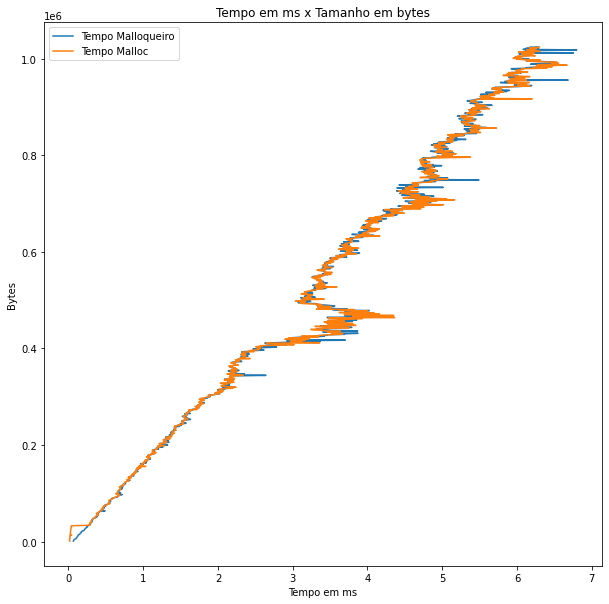

In [4]:
plt.figure(figsize=(10,10), facecolor='white')
plt.plot(df['Tempo Malloqueiro'], df['Tamanho'], label='Tempo Malloqueiro')
plt.plot(df['Tempo Malloc'], df['Tamanho'], label='Tempo Malloc')
plt.title('Tempo em ms x Tamanho em bytes')
plt.ylabel('Bytes')
plt.xlabel('Tempo em ms')
plt.legend()
plt.savefig('resultados/grafico_1.png', dpi=1500)
plt.show()